<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/main/OMA_search/OMA_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# copy repo to get available datafiles

!git clone https://github.com/alibekk93/IDP_analysis.git

Cloning into 'IDP_analysis'...
remote: Enumerating objects: 608, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 608 (delta 99), reused 133 (delta 50), pack-reused 385
Receiving objects: 100% (608/608), 223.38 MiB | 31.92 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Checking out files: 100% (50/50), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
oma = pd.read_csv('/content/IDP_analysis/OMA_search/OMA_allSpecies.csv')
tempura = pd.read_excel('/content/IDP_analysis/OMA_search/200617_TEMPURA.xlsx')

In [28]:
oma.head(3)

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.
0,TREPP,Tremblaya princeps (strain PCIT),NaN,2013-Dec-17,120,891398,B
1,HODCD,Hodgkinia cicadicola (strain Dsem),NaN,2013-May-28,169,573234,B
2,CARRP,Carsonella ruddii (strain PV),NaN,2007-May-03,182,387662,B


In [29]:
tempura.head(3)

,genus_and_species,taxonomy_id,strain,superkingdom,phylum,class,order,family,genus,assembly_or_accession,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
0,Methanopyrus kandleri,2320,116,Archaea,Euryarchaeota,Methanopyri,Methanopyrales,Methanopyraceae,Methanopyrus,NaN,...,NaN,AB301476,67.7,85.0,100.0,NaN,NaN,122.0,37.0,NaN
1,Geogemma barossii,1927912,121,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Geogemma,NaN,...,NaN,NaN,NaN,85.0,106.0,NaN,NaN,121.0,36.0,NaN
2,Pyrolobus fumarii,54252,1A,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Pyrolobus,GCA_000223395.1,...,1.8,X99555,68.4,90.0,106.0,NaN,NaN,113.0,23.0,NaN


In [82]:
oma['genus_and_species'] = [' '.join(sn.split(' ')[:2]) for sn in oma['Scientific Name']]

In [84]:
oma_tempura = pd.merge(left=oma, right=tempura, on='genus_and_species', how='inner')

In [86]:
oma_tempura[['Code', 'genus_and_species', 'Tmin', 'Topt_ave', 'Tmax']]

,Code,genus_and_species,Tmin,Topt_ave,Tmax
0,MYCMO,Mycoplasma mobile,17.0,30.0,30.0
1,UREU1,Ureaplasma urealyticum,20.0,32.5,40.0
2,METFV,Methanothermus fervidus,65.0,83.0,97.0
3,DEHMB,Dehalococcoides mccartyi,15.0,27.5,35.0
4,DEHMG,Dehalococcoides mccartyi,15.0,27.5,35.0
...,...,...,...,...,...
415,ACTM4,Actinoplanes missouriensis,15.0,28.0,32.0
416,ACAM1,Acaryochloris marina,20.0,29.0,35.0
417,STIAD,Stigmatella aurantiaca,18.0,30.0,37.0
418,CATAD,Catenulispora acidiphila,11.0,25.0,37.0


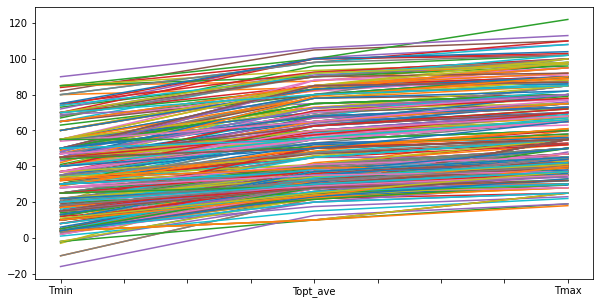

In [87]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(oma_tempura)):
  oma_tempura.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')